# Discalimer
Tulisan ini milik **[Piyut Dyoni](https://medium.com/@piyut.dyoni)** saya hanya membuat artikelnya kedalam Jupyter Notebook.  
Artikel aslinya bisa dibaca [di sini](https://medium.com/@piyut.dyoni/machine-learning-buat-yang-ngerasa-bodo-e37bc5b26d9d)

## Machine Learning Buat yang Ngerasa Bodo (kayak gue)

### Disclaimer! 
> Yang nulis ini bukan dosen, bukan programmer expert, bukan. Karena penulis ngerasa bodo, maka penulis cuma mau share barangkali ada orang-orang yang sama-sama ngerasa bodo dan semoga ini bisa membantu. Kalo ada penjelasan yang salah silahkan komen supaya penulis lebih belajar lagi.

Halo! Hari ini bakal aku praktekin gimana kerja machine learning pake famous dataset yang udah available dari sklearn. Tutorial ini berasal dari channelnya [Data School](https://www.youtube.com/channel/UCnVzApLJE2ljPZSeQylSEyg). Ini recommended banget karena tutornya sabar banget. Yaa buat saya yang tipe auditori dan lebih nyantol lewat sesuatu yang ada suara-suaranya, maka tutorial youtube lah yang paling membantu. Tutorial di video itu bahasa Inggris, so kenapa tutorial ini Bahasa Indonesia? soalnya tutorial Bahasa Inggris udah banyak bos! jadi buat ngebantu yang punya kendala pemahaman di bahasa Inggris, aku buat aja yang kaya gini dengan penjelasan dan bahasa yang sangat sederhana. Asumsiku sih ini pelajaran udah ribet, kalo dijelasin dengan bahasa yang ribet kan mikirnya dua kali hehe.. Ok deh Cekidot! ^^


## Sejenak soal Machine Learning

Machine Learning itu intinya berkaitan dengan automasi. Gimana caranya komputer belajar dari contoh-contoh yang kita berikan, terus memprediksi sesuatu yang sesuai dengan contoh-contoh tadi.

Jadi ada yang namanya Supervised dan Unsupervised Learning. Supervised itu artinya udah termanage dengan baik. Maksudnya misal kamu punya data yang fitur dan labelnya udah jelas. Misal kalo ciri-ciri orang sawo matang, rambut hitam, itu berarti udah jelas orang Asia Tenggara.

Kalo Unsupervised learning itu targetnya atau labelnya belom jelas. Metode yang dipakai biasanya Clustering. Jadi kita cuma ngelompokin data yang punya keterkaitan satu sama lain, tanpa tahu mereka sebenernya bener-bener satu label atau enggak.


## Mempersiapkan Dataset

Di tutorial ini, kita bakal pake dataset yang udah populer banget, namanya [Iris](https://archive.ics.uci.edu/ml/datasets/Iris). Ini udah tersedia by default dari [Sklearn](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) nya. Dataset ini isinya tentang 3 macam spesies bunga beserta ukuran petal dan sepal. Ini nih buat yang belum tahu sepal dan petal :

![Petal-sepal](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Petal-sepal.jpg/220px-Petal-sepal.jpg)

Nah, data ini adalah csv, yang kalo dijadikan tabel, tiap barisnya menunjukan berbagai jenis spesies bunga yang berbeda, sedangkan kolomnya menunjukan fitur data yaitu : `sepal length`, `sepal width`, `petal length`, dan `petal width` secara berurutan (BTW ada 4 kolom ya).

Jenis bunganya ada 3: `setosa`, `versicolor` dan `virginica`. Ada 50 sampel data tiap jenis bunga nya. jadi kalo di total ada 50x3 sampel data = 150 sampel data.

Oke deh langsung aja, cekidot!



In [4]:
# disini aku bakal import datanya dari sklearn
from sklearn.datasets import load_iris

iris=load_iris()   #datanya di load dulu!
x=iris.data    #fitur data, di print aja kalo mau lihat
y=iris.target   #label data, di print aja kalo mau lihat

iris.target_names # buat tahu arti dari iris.target sebenarnya.
iris.feature_names # buat tahu arti dari fitur2 di iris.data
type(iris.data) # kalo mau tahu tipedata nya iris data
iris.data.shape # kalo mau tahu shape atau bentuk metriks dari iris data


(150, 4)

Nah yang barusan kita misahin antara `fitur` dan `label`nya di `x` dan `y`.   
Kalo di Machine Learning, **Fitur itu kaya ciri-cirinya** dan **Label tuh ya namanya.**   
Misal, Bunga spesies Sentosa punya ukuran panjang petal 3.2, lebar petal 2.3, panjang sepal 2.1 dan lebar sepal 1.2.   
Nah kalo di ML:
- **fiturnya adalah kesemua ukuran petal dan sepal.**
- **Labelnya adalah spesies Sentosa.**


Di SKlearn, ada beberapa syarat yang harus dipenuhi:   
1. **Fitur dan label harus dipisah jadi objek yang berbeda**, kaya yang aku praktekin diatas. Kenapa? biar kaga nyampur pas di training ntar. Singkatnya sih begituh.
2. **Fitur dan label harus numeric**, jadi kalo misal label diatas itu nama-nama bunga, kita ganti jadi nomor, misal `sentosa=0`, `versicolor=1`, `virginica=2`.
3. **Fitur dan label harus dalam format Numpy array.** (Why? aku belom bisa jelasin lebih detail sih, tapi lo bisa riset sendiri atau ini bisa jadi PR gue ngejelasin di kesempatan berikutnya.)
4. **Fitur dan label harus dalam bentuk metriks yang spesifik.**

Nah setelah ini kita bakal training data2 tadi dengan metode klasifikasi **KNN (K-Nearest Neighbor).**


## Sejenak Soal KNN

Kenapa kita pake metode klasifikasi di tutorial ini?

1. Karena data yang kita punya adalah Supervised
2. Karena data yang kita punya nggak continuous. Maksudnya?

Jadi gini.. kalo di `Supervised` itu **bisa di-solve pake dua Estimator atau metode**, **Classification** atau **Regression.** Tergantung output yang kamu inginkan.

**Classification itu buat yang outputnya diskrit atau pasti.** 1 ya 1, kucing ya kucing. Bukan mirip kucing atau mendekati 1.   
Contoh, kalo di dataset ini, output yang kita inginkan apakah input kita termasuk spesies sentosa, versicolor atau virginica. Sentosa ya sentosa, bukan mirip sentosa.

**Regression itu buat yang outputnya continous**, misalnya kita nebak harga Nasi Goreng 8500 rupiah. Padahal harga aslinya 9000. Ini masih bisa di toleransi sama Regression dan boleh dibilang prediksi yang bagus.

KNN adalah salah satu metode klasifikasi yang sangat amat simple dan mudah. Penjelasan yang bagus dan berbahasa Indonesia bisa dilihat [disini](http://depandienda.it.student.pens.ac.id/file/knn_references.pdf) (atau didalam folder **`docs/knn_references.pdf`**.)

Jadi intinya **KNN itu berbasiskan tetangga terdekat.** Akurasi KNN biasanya tergantung `K`-nya. Maksudnya, jumlah tetangga yang terdekat. Misal, `K=4` untuk klasifikasi `‘a‘` apakah termasuk bebek atau sapi. Disini kita lihat 4 posisi tetangga terdekat dari `‘a’`. Eh ternyata ada 3 sapi yang lebih deket jaraknya sama `‘a’` sedangkan cuma 1 bebek yang deket sama `‘a’`. Disini bisa disimpulkan kalo `‘a’` adalah sapi.


In [5]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn=KNeighborsClassifier(n_neighbors=1) #define K=1

knn.fit(x,y)
a=np.array([[1.0,2.7,3.6,4.2]])
knn.predict(a)


array([2])


Nah disini aku bakal jelasin sedikit soal OOP (Object Oriented Python). Jadi ketika kita ngimpor class `KNeighborsClassifier` dari library [Sklearn](https://scikit-learn.org) ada beberapa atribut disana, yaitu parameter-parameter penting buat KNN, kaya `n_neighbors` yang menentukan jumlah `K` di `KNN.` Jadi pas kita define `knn=KNeighborsClassifier(n_neighbors=1)`, kita sebenernya kaya manggil class `KNeighborsClassifier` tapi dengan nama `knn`. Ini namanya `instantiate` the `instance`. Kamu bisa baca2 lagi deh soal OOP.

Nah terus kalo kita `print(knn)` nya bakal ketahuan tuh parameter2 asli dari si class `KNeighborsClassifier`, yang mana sebenernya gapapa kalo kita ga panggil pas inisiasi instance `knn`, cuman kalo ga dipanggil atau ga di set sendiri, ya bakal ke-`set` sendiri secara default.

Next, apa yang terjadi di `knn.fit(x,y)`?   
well itu kamu perlu tahu matematikanya KNN. Yang kita tau di Sklearn kita udah terima jadi. Jadi pas kita code `knn.fit(x,y)`, si KNN bakal belajar dari fitur dan label2 yang ada.   
Sehingga, pas kita masukin data baru, yang kita define sebagai `a` diatas ke `knn.predict(a)`, si KNN bakal otomatis ngasih tau kira2 `a` itu masuk klasifikasi label yang mana. `0`, `1` atau `2`. Nah jawabannya itu `array([2])` artinya label 2, which is spesies virginica.


## Partisi Data

Data yang kita punya kudu dipartisi atau dibagi-bagi jadi `train data` dan `test data`. Biasanya ukurannya `8:2` buat train vs test datanya. Di tutorial ini kita bakal tau 2 jenis pembagian data yaitu:

1. Train Test Split
2. K-fold


## Train Test Data

Yang akan kita lakukan adalah ngebagi kesemua 150 data jadi 2 bagian, data training dan data testing. Perbandingannya bakal otomatis `80:20` persen. Well sebenernya ga pas-pas banget sih. tapi ya sekitaran itu. Jadi bakal ada `x` buat `training` dan `testing`, begitu juga dengan `y` bakal ada y buat training dan testing. **BTW testing itu digunain buat prediksi.**


In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=5)

print(x_train.shape) #buat tau bentuknya x_train (112 baris dan 4 kolom)
print(x_test.shape)  #buat tau bentuknya x_test (38 baris dan 4 kolom)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred)  #hasil prediksi 
print(y_test)  #jawaban yang sebenarnya

print(metrics.accuracy_score(y_test, y_pred))  #score prediksi


(112, 4)
(38, 4)
[1 2 2 0 2 1 0 2 0 1 1 1 2 2 0 0 2 2 0 0 1 2 0 2 1 2 1 1 1 2 0 1 1 0 1 0 0
 2]
[1 2 2 0 2 1 0 1 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2 0 1 1 0 1 0 0
 2]
0.9210526315789473



Jadi `x_train` ada **112 data** (80-an%) dan `x_test` ada **38 data** (20-an%). 
Terus kita mulai training `x_train` dan `y_train`. terus `x_test` nya di prediksi dan dimasukan ke variabel `y_pred` yang bakal jadi `array` yang berisi hasil klasifikasi dari ke-38 data dari `x_test`.

Finally, kita lihat akurasi dari prediksi tadi. Pas ini kita bandingin `y_test` dan `y_pred`, karena `y_test` itu adalah hasil yang seharusya. jadi akurasi disini ngitung sejauh mana sih si `y_pred` ini memenuhi jawaban yang sesungguhnya, yaitu `y_test`?


## K-Fold Cross Validation

K-Fold adalah salah satu metode Cross Validation yang populer dengan melipat data sebanyak K dan mengulangi (men-iterasi) experimennya sebanyak K juga.

Misal nih, data kita ada 150. Ibarat kita pake `K=5`, berarti **kita bagi 150 data menjadi 5 lipatan**, isinya **masing-masing 30 data**. Eits, jangan lupa, kita perlu menentukan mana yang **training data** dan mana yang **test data**. Karena perbandingannya `80:20`, berarti **120 data adalah training data** dan **30 sisanya adalah test data**. Berdasarkan ke-5 lipatan tadi, berarti bakal ada **4 lipatan** (kita ganti aja ya nyebutnya jadi **partisi** ajah) x **30 data** = **120 training data**. Dan sisanya ada **1 partisi test data berisi 30 data.**

Kemudian, experimen menggunakan data yang udah di partisi-partisi bakal **diulang 5 kali** (`K=5`). **Tapi posisi partisi Test data berbeda ditiap iterasinya.** Misal di iterasi pertama Test nya di posisi partisi awal, terus iterasi partisi kedua Test-nya di posisi kedua, dan seterusnya, **pokonya gaboleh sama**. Berikut nih gambarannya biar lebih _ngeh_.

![K-Fold iteration](../static/images/k-fold-iteration.png)


In [7]:
from sklearn.model_selection import KFold

kf=KFold(n_splits=5, shuffle=False)
print(kf)  #buat tau Kfold dan parameter defaultnya

i=1        #ini gapenting, cuma buat nandain fold nya.
for train_index, test_index in kf.split(x):
    print("Fold: ", i)
    print("TRAIN: ", train_index, "TEST: ", test_index)
    x_train=x[train_index]
    x_test=x[test_index]
    y_train=y[train_index]
    y_test=y[test_index]
    i+=1

print("shape x_train: ", x_train.shape)
print("shape x_test: ", x_test.shape)

KFold(n_splits=5, random_state=None, shuffle=False)
('Fold: ', 1)
('TRAIN: ', array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149]), 'TEST: ', array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))
('Fold: ', 2)
('TRAIN: ', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
      

Naah jadi teman2, apakah yang terjadi disini??   
Jadi inget, kita punya **150 data** dan bakal **dibagi 2**, **train** dan **test**. Jadi kita bayangin 1 fold dulu deh, Fold yang paling pertama. Disana ada **120 train data** dan **30 test data**. Terus kalo kamu run code diatas, yang di print disitu bakal **indeks datanya**. Inget, indeks doang ya.    
Jadi bayangin aja misal di fold pertama itu ada angka 30. Artinya `x[30]` (`x` indeks ke 30) yang berisi `4 kolom data petal dan sepal`. begitu deh seterusnya.

Kenapa ini harus dilakukan? supaya proses training nya lebih akurat sehingga prediksinya nanti lebih mantap.


## Cross Validation

In [8]:
from sklearn.model_selection import cross_val_score

knn= KNeighborsClassifier(n_neighbors=5)
score= cross_val_score(knn, x, y, cv=10, scoring='accuracy') 

print(score)        
print(score.mean())


[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668


Disini kita coba implementasi `cross_validation` yang sesungguhnya. ada 5 parameter di `cross_val_score`. lo bisa liat lebih detail di [dokumentasinya sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score). Yang jelas `'cv'=cross` validation alias jumlah fold nya. 

Ketika score di print bakal ketauan akurasi tiap iterasi. Kalo kita rata-rata-in, maka scorenya **96%**. Sebenernya yang kita code disini lebih praktis dari partisi-partisian tadi. I mean, **`cross_val_score` udah nyedian fungsi partisian sendiri** jadi kita gausah pusing kudu ngebagi-bagi data.


## Tuning Parameter (Hyperparameter)


In [9]:
k_range = range(1,31)  #1-30
k_score = []

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    score= cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_score.append(score.mean())

print(k_score)


[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Kalo ngomongin klasifikasi itu bawaannya seberapa akurat sih klasifikasi data kita?   
nah di KNN ni punya **beberapa parameter** yang menentukan **tinggi rendahnya akurasi klasifikasi** kita.   
Yaitu jumlah `K` pada `KNN`. Kita harus nyobain nih kira2 `K=berapa` sih yang menghasilkan akurasi paling tinggi?   
Proses kaya gini nih, nyari parameter yang akurasinya tinggi, namanya **[Tuning Parameter](https://en.wikipedia.org/wiki/Hyperparameter_optimization)** atau biasanya dibilang juga **Finding Hyperparameter**.

Disini kita coba `1–30 K`. Ntar bakal keliatan `K` mana yang akurasinya paling jitu.
Semua score pada `K` yang berbeda2 disimpan di variable `k_score`. Nah kalo kamu run, hasilnya `array` yang banyak itu adalah ke `30 score` dari `K 1–30`.

Ribet ya ngeliatnya? jadi mending kita plot aja itu scorenya.


## Plotting Data

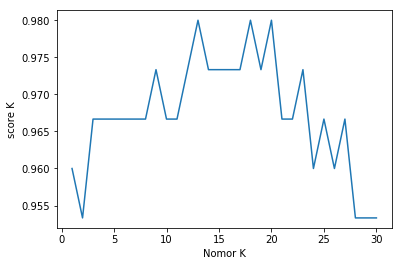

In [10]:
import matplotlib.pyplot as plt

plt.plot(k_range, k_score)
plt.xlabel('Nomor K')
plt.ylabel('score K')
plt.show()


Ada dua cara yang gue tau buat nge-**plot gambar**. Pake [Matplotlib](https://matplotlib.org) atau [Plotly](https://plot.ly). Yang pertama ini [matplotlib](https://matplotlib.org). Tapi gue personally lebih suka plotly sih. soalnya lebih jelas gt dan cantik hehe. ya walaupun lebih ribet dikit sih code nya. Sayang disini aku cuma bisa upload png nya. Kalo kamu coba sendiri, kalo kamu hover ke diagramnya, detailnya bakal keliatan gitu jadi lebih akurat. Kamu bisa baca-baca tentang plotly [disini](https://plot.ly).


In [12]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

tls.set_credentials_file(username='piyutdyoni', api_key='0fv0PaGxGfWzT72e6S7m')
trace1 = go.Scatter(
                    x=k_range, y=k_score, # Data
                    mode='lines', name='K of KNN' # Additional options
                   )

layout = go.Layout(title='Score of K in KNN',
                   plot_bgcolor='white')

fig = go.Figure(data=[trace1], layout=layout)

# Plot data in the notebook
py.iplot(fig, filename='score of K in KNN')


Jadi kedua linechart ini menggambarkan kalo `K` yang menghasilkan `score tertinggi` adalah `13`, `18`, dan `20`. Tapi karena **batas tertinggi** ada di `20`, soalnya abis itu **scorenya cenderung turun**, maka **kita ambil pinalty bahwa 20 adalah K** yang paling mentok dan menghasilkan score tinggi. Soo… mari kita buktikan apakah `20` adalah jawaban yang benar.


In [13]:
knn=KNeighborsClassifier(n_neighbors=20)
score=cross_val_score(knn, x, y, cv=10, scoring='accuracy').mean()

print(score) #well, hasilnya 98% ^^


0.9800000000000001


Naah sekarang at least kamu ga ngerasa bodo-bodo amat laah.. kita abis mempraktekan Machine Learning. Gue personally percaya semua orang ga ada yang bodo, you just need to find out what are you good at.

Thank You! ^^